In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#zaczytanie danych
train = pd.read_csv(r"C:\Users\AntoSzu\Downloads\data_green\train_green.csv")
test = pd.read_csv(r"C:\Users\AntoSzu\Downloads\data_green\test_green.csv")
#w zadaniu 2 X to predykcja z modelu
X_train = train['PRED']
y_train = train['TARGET']
X_test = test['PRED']
y_test= test['TARGET']

In [78]:
#conformity scores dla zbioru kalibracyjnego
conformity_scores = np.maximum(X_train-y_train, y_train-X_train)
#zadany poziom alpha
alpha = 0.1
#liczność próby
n = len(X_train)
#kwantyl scorów
qhat_0 = np.quantile(conformity_scores, np.ceil((n+1)*(1-alpha))/n)
#regresja dla zbioru testowego
#przedział jedynie dla unikatowych wartości predykcji
x = np.unique(X_test)
output = np.array([x-qhat_0,x+qhat_0])

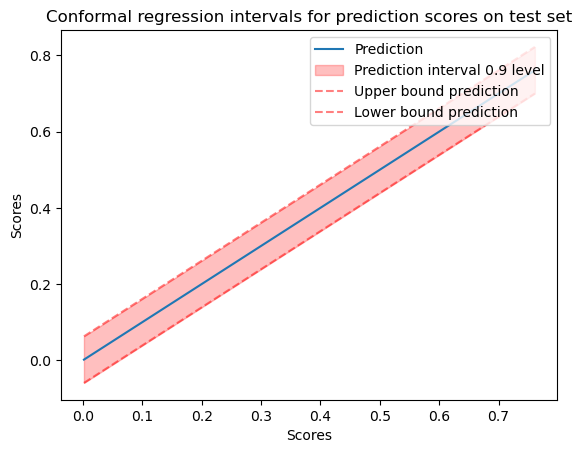

In [79]:
#wykres przedziałów
plt.plot(x,x, label = 'Prediction')
plt.fill_between(x, output[0,:], output[1,:], color='r', alpha=.25, label = f'Prediction interval {np.round(1-alpha,2)} level')
plt.plot(x,output[0,:], label = 'Upper bound prediction', color = 'r', linestyle = '--', alpha = 0.5)
plt.plot(x,output[1,:], label = 'Lower bound prediction', color = 'r', linestyle = '--', alpha = 0.5)
plt.legend(loc = 'upper right')
plt.xlabel('Scores')
plt.ylabel('Scores')
plt.title('Conformal regression intervals for prediction scores on test set')
plt.show()
plt.show()